## HITS

In [2]:
from collections import defaultdict
import logging
logging.basicConfig(level=logging.DEBUG, format="%(asctime)s: (%(lineno)s) %(levelname)s %(message)s")
import operator
import random
import re

%matplotlib inline
import matplotlib.pyplot as plt
%pylab inline
pylab.rcParams['figure.figsize'] = (18, 6)

import networkx as nx
from networkx.algorithms import community

Populating the interactive namespace from numpy and matplotlib


/home/makrai/tool/python/venv3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
def read_pos_dict():
    logging.info('Reading POS data...')
    pos_d = defaultdict(lambda: 'unk')
    with open('/mnt/permanent/Language/Hungarian/Crawl/Web2/ana/all_morphtable', encoding='latin2') as infile:
        for i, line in enumerate(infile):
            try:
                word, w_per_ana = line.strip().split()
                ana = re.findall('[A-Z][A-Z-]+', w_per_ana)[0]
                pos_d[word] = ana
            except:
                continue
    logging.debug(pos_d.values())
    logging.info('Finished.')
    return pos_d

pos = read_pos_dict()

2018-01-16 17:53:13,282: (2) INFO Reading POS data...
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
2018-01-16 17:53:51,240: (13) INFO Finished.


In [4]:
def get_pos_color():
    #['b', 'g', 'r', 'c', 'm', 'y', 'k']
    pos_color = defaultdict(lambda: 'k')
    pos_color.update({
        'NOUN': 'b',
        'VERB': 'g',
        'ADJ': 'c',
        'NUM': 'y',
        'ADV': 'm',
        'CONJ': 'r'})
    #pos_color['NUM'] = pos_color['ADJ']
    return pos_color
    
pos_color = get_pos_color()

In [5]:
pos['dolog']

'NOUN'

In [6]:
def get_hits_auth_deg(size, directed=True):
    G = nx.read_gpickle(
            '/mnt/permanent/home/makrai/project/TextBetweenness/mnsz_{}-sent.gpickle'.format(size))
    logging.info('Graph with {} nodes and {} edges read.'.format(nx.number_of_nodes(G), nx.number_of_edges(G)))
    deg = nx.degree_centrality(G)
    if not directed:
        G = nx.to_undirected(G)
    logging.info('Computing HITS...')
    hits, auth = nx.hits(G)
    return hits, auth, deg

hits, auth, deg = get_hits_auth_deg('10k')

2018-01-16 17:53:53,908: (4) INFO Graph with 42992 nodes and 111141 edges read.
2018-01-16 17:53:53,962: (8) INFO Computing HITS...


In [7]:
def sort_by_value(dict_):
    return sorted(dict_.items(), key=operator.itemgetter(1), reverse=True)


def plot_against(cent, deg, cent_limit=10**-8, savefig_fn=None):
    plt.clf()
    plt.xscale('log')
    plt.yscale('log')
    ws = cent.keys()
    ws = [w for w in ws if cent[w] > cent_limit]
    relevant_pos = ['VERB', 'ADJ', 'NUM', 'ADV', 'CONJ']
    plt.scatter(
        [deg[wd] for wd in ws],
        [cent[wd] for wd in ws],
        c=[pos_color[pos[wd]] for wd in ws],
        s=[20 if pos[wd] in relevant_pos else .5 for wd in ws])
    for wd in ws:
        if False:#cent[wd] < 10**-50:
            #random.random() < .05
            plt.annotate(wd, (background[wd], cent[wd]))
    plt.xlabel('log(fokszám-központiság)')
    plt.ylabel('log(tekintély)')
    if savefig_fn:
        plt.savefig(savefig_fn)

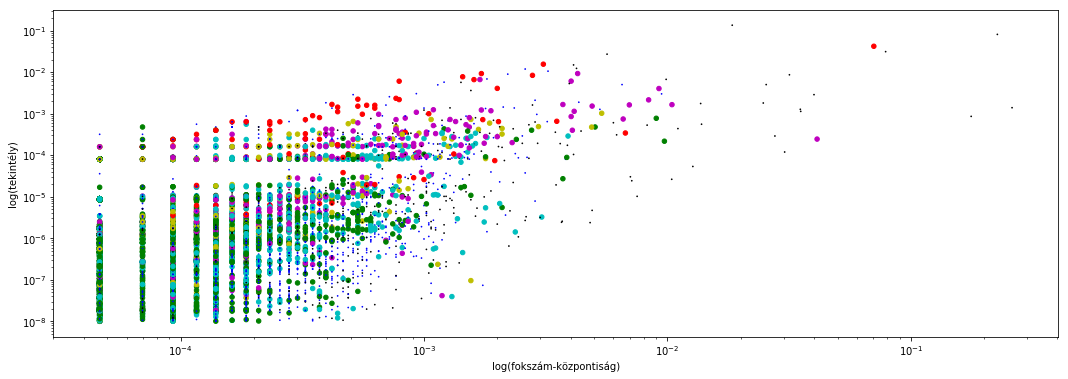

In [8]:
plot_against(auth, deg, savefig_fn='paper/auth_poster.png')

In [9]:
main('10k')

NameError: name 'main' is not defined

In [ ]:
main('100', directed=False)



| # sent| time for HITS |
|-------|------|
|    1 k| 2 sec|
|   10 k|13 sec|
|  100 k|48 sec|
|    1 m|13 min|
|   43 m||

In [ ]:
for size in ['1k']:
    logging.info('Computing centrality for {} sentences ({} nodes)'.format(size, Gs[size].number_of_nodes()))
    degree = nx.degree_centrality(Gs[size])
    _, centrality = nx.hits(Gs[size])
    logging.info('Plotting...')
    plot_against_degree(centrality, background=degree)#dict(random.sample(centrality.items(), 1000)))

# POS type freq

In [ ]:
type_freq_of_pos = defaultdict(int)
for node  in G.nodes():
    if False:#pos[node] == 'unk':
        logging.debug('Unknow word in sample: {}'.format(node))
    type_freq_of_pos[pos[node]] += 1

sort_by_value(type_freq_of_pos)[:15]

# Attic